In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Chargement des données
df = pd.read_csv("datasets/vgsales.csv")

## Traintement de données

In [ ]:
# Données manquantes
df = df.dropna()

# Agrégation des ventes par genre
sales_by_genre = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).reset_index()

# Agrégation des ventes par région
regional_sales = {
    "Amérique du Nord (NA)": df["NA_Sales"].sum(),
    "Europe (EU)": df["EU_Sales"].sum(),
    "Japon (JP)": df["JP_Sales"].sum(),
    "Autres régions": df["Other_Sales"].sum()
}

# Conversion en DataFrame
sales_df = pd.DataFrame.from_dict(regional_sales, orient='index', columns=["Ventes (en millions)"])
sales_df = sales_df.sort_values(by="Ventes (en millions)", ascending=False).reset_index()
sales_df.columns = ["Région", "Ventes (en millions)"]

# Liste des plateformes Nintendo (selon les données connues)
nintendo_platforms = ["DS", "3DS", "Wii", "WiiU", "GBA", "GC", "Switch", "SNES", "NES", "N64"]

# Agrégation des ventes japonaises par plateforme
jp_sales_by_platform = df.groupby("Platform")["JP_Sales"].sum().sort_values(ascending=False).reset_index()

# Ajout d’une colonne "Marque"
jp_sales_by_platform["Constructeur"] = jp_sales_by_platform["Platform"].apply(
    lambda x: "Nintendo" if x in nintendo_platforms else "Autre"
)

# Calcul total ventes Nintendo vs Autres au Japon
nintendo_vs_others = jp_sales_by_platform.groupby("Constructeur")["JP_Sales"].sum().reset_index()

###

## Hypothèse

### Les jeux d'action sont-ils les plus vendus dans le monde ?

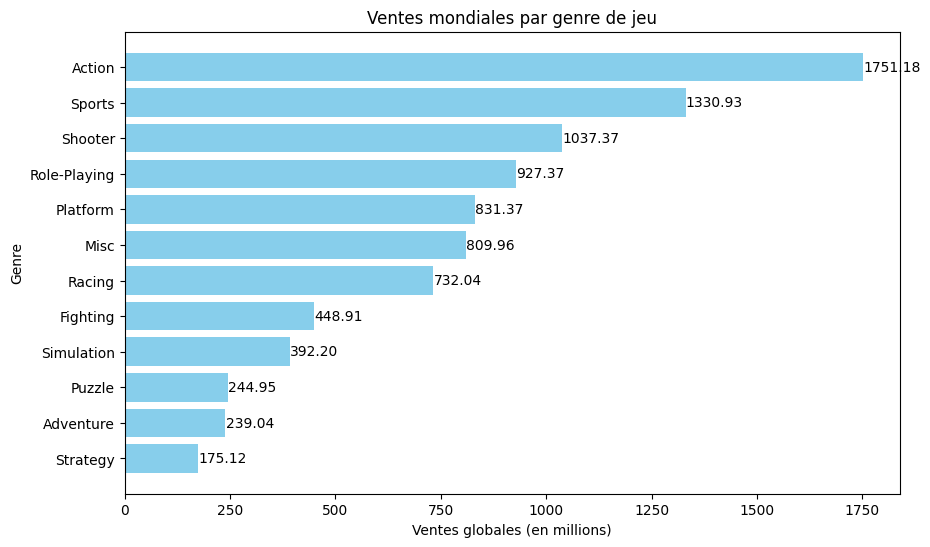

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(sales_by_genre["Genre"], sales_by_genre["Global_Sales"], color="skyblue")
ax.invert_yaxis()  # Pour avoir le genre le plus vendu en haut
ax.set_xlabel("Ventes globales (en millions)")
ax.set_ylabel("Genre")
ax.set_title("Ventes mondiales par genre de jeu")

# Afficher les valeurs sur les barres
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center')

plt.show()  # Ajoutez cette ligne à la fin

##### ✅ Conclusion : Oui, les jeux d'action sont les plus vendus dans le monde, avec un total de 1751.18 millions d’unités vendues.

### Les États-Unis représentent-ils la plus grande part de consommation de jeux vidéo ?

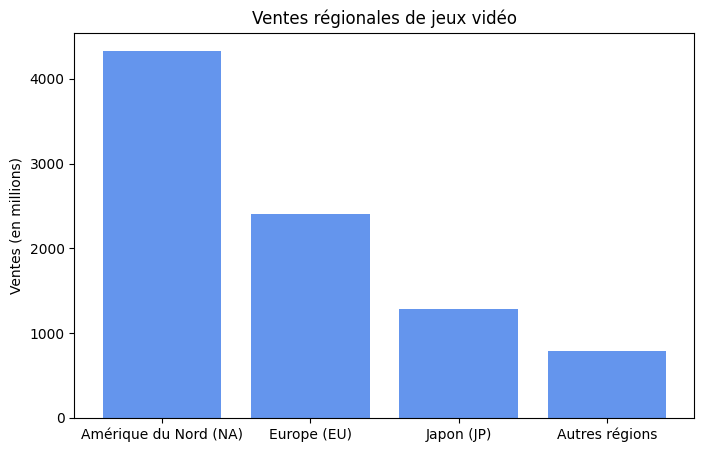

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(sales_df["Région"], sales_df["Ventes (en millions)"], color="cornflowerblue")
ax.set_ylabel("Ventes (en millions)")
ax.set_title("Ventes régionales de jeux vidéo")
plt.show(fig)

#### ✅ Conclusion : Oui, l'Amérique du Nord est la plus grande consommatrice de jeux vidéo, avec un total de 4392.95 millions d’unités vendues.

### Les joueurs japonais consomment-ils principalement des jeux sur les consoles Nintendo ?

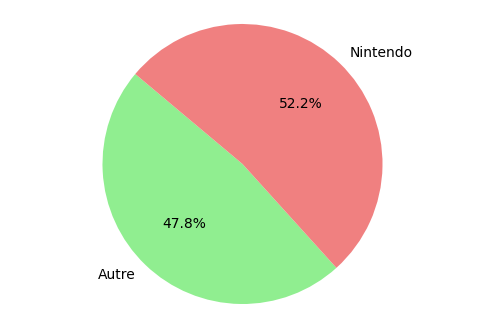

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["lightgreen", "lightcoral"]
ax.pie(nintendo_vs_others["JP_Sales"], labels=nintendo_vs_others["Constructeur"], autopct='%1.1f%%', startangle=140, colors=colors)
ax.axis('equal')
plt.show(fig)

#### ✅ Conclusion : Oui, les joueurs japonais consomment majoritairement des jeux sur les consoles Nintendo, représentant 52.16% des ventes au Japon.